
# EDA Case Study — Credit Application & Previous Application
**Author:** Data Analyst (assistant)

**Purpose:** Complete end-to-end Exploratory Data Analysis (EDA) for a credit application dataset (`application*.csv`) and its `previous_application` table. This notebook is written so you can run it locally against your real CSV files. It includes robust loading, cleaning, visualizations, aggregation of previous applications, feature engineering, and recommended next steps for analyzing and acting on application _rejections_.

**What you get:**

- A step-by-step EDA workflow with runnable code cells.
- Automated detection of common file names (`application*.csv`, `previous*.csv`).
- Aggregation logic for previous applications (per-customer features).
- Cleaned dataset export and suggested modeling pipeline snippets (baseline models + interpretability).
- Practical business recommendations for handling rejections.

---

*Instructions:* Put your `application.csv` (or similarly named file) and `previous_application.csv` in the same folder as this notebook and run the cells in order.


In [11]:
# Core Python
import os
import glob
import warnings
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Statistics
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# Machine Learning
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Tree-based Models
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Explainability
import shap

# Utility
import joblib

In [51]:

import os, glob
import pandas as pd, numpy as np

app = pd.read_csv("application_train.csv")
prev = pd.read_csv("previous_application.csv")

print("application shape:", app.shape)
print("previous_application shape:", prev.shape)


FileNotFoundError: [Errno 2] No such file or directory: 'application_train.csv'

In [13]:

# Quick exploration
print('\n--- APPLICATION: basic info ---')
display(app.head(3))
display(app.info())

print('\n--- Missingness summary (APPLICATION) ---')
def missing_summary(df):
    m = df.isnull().sum().rename('n_missing').to_frame()
    m['pct_missing'] = (m['n_missing'] / len(df)) * 100
    return m.sort_values('pct_missing', ascending=False)

display(missing_summary(app).head(40))

if prev is not None:
    print('\n--- PREVIOUS_APPLICATION: basic info ---')
    display(prev.head(3))
    display(prev.info())
    print('\n--- Missingness summary (PREVIOUS_APPLICATION) ---')
    display(missing_summary(prev).head(40))



--- APPLICATION: basic info ---


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_LAST_DUE_min_log1p,DAYS_TERMINATION_median_log1p,DAYS_TERMINATION_min_log1p,NFLAG_INSURED_ON_APPROVAL_min_log1p,prev_status_Cash loans_log1p,prev_status_Consumer loans_log1p,prev_status_Revolving loans_log1p,prev_status_XNA_log1p,prev_app_count_log1p,SK_ID_CURR_capped
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.693147,1.098612,0.693147,0.0,1.609438,100002
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,1.945910,1.386294,0.693147,0.0,2.397895,100003
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,1.098612,0.693147,0.000000,0.0,1.386294,100004


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 439 entries, SK_ID_CURR to SK_ID_CURR_capped
dtypes: float64(367), int64(40), object(32)
memory usage: 1.0+ GB


None


--- Missingness summary (APPLICATION) ---


,n_missing,pct_missing
SK_ID_CURR,0,0.0
REG_REGION_NOT_LIVE_REGION_log1p,0,0.0
LIVINGAPARTMENTS_AVG_log1p,0,0.0
LANDAREA_AVG_log1p,0,0.0
FLOORSMIN_AVG_log1p,0,0.0
ENTRANCES_AVG_log1p,0,0.0
ELEVATORS_AVG_log1p,0,0.0
COMMONAREA_AVG_log1p,0,0.0
BASEMENTAREA_AVG_log1p,0,0.0
APARTMENTS_AVG_log1p,0,0.0



--- PREVIOUS_APPLICATION: basic info ---


,index,SK_ID_CURR,SK_ID_PREV_count,SK_ID_PREV_nunique,SK_ID_PREV_mean,SK_ID_PREV_median,SK_ID_PREV_std,SK_ID_PREV_min,SK_ID_PREV_max,AMT_ANNUITY_count,...,prev_mode_NAME_PRODUCT_TYPE,prev_mode_CHANNEL_TYPE,prev_mode_NAME_SELLER_INDUSTRY,prev_mode_NAME_YIELD_GROUP,prev_mode_PRODUCT_COMBINATION,prev_status_Cash loans,prev_status_Consumer loans,prev_status_Revolving loans,prev_status_XNA,prev_app_count
0,0,0,1,1,1.369693e+06,1369693.0,0.000000,1369693,1369693,1,...,XNA,Country-wide,Connectivity,high,POS mobile with interest,0,1,0,0,1
1,1,1,1,1,1.038818e+06,1038818.0,0.000000,1038818,1038818,1,...,XNA,Stone,Auto technology,low_normal,POS other with interest,0,1,0,0,1
2,2,2,3,3,2.281150e+06,2396755.0,424796.348991,1810518,2636178,3,...,XNA,Country-wide,Consumer electronics,middle,Cash X-Sell: low,1,2,0,0,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338857 entries, 0 to 338856
Columns: 163 entries, index to prev_app_count
dtypes: float64(94), int64(53), object(16)
memory usage: 421.4+ MB


None


--- Missingness summary (PREVIOUS_APPLICATION) ---


,n_missing,pct_missing
index,0,0.0
DAYS_LAST_DUE_nunique,0,0.0
DAYS_FIRST_DRAWING_std,0,0.0
DAYS_FIRST_DRAWING_min,0,0.0
DAYS_FIRST_DRAWING_max,0,0.0
DAYS_FIRST_DUE_count,0,0.0
DAYS_FIRST_DUE_nunique,0,0.0
DAYS_FIRST_DUE_mean,0,0.0
DAYS_FIRST_DUE_median,0,0.0
DAYS_FIRST_DUE_std,0,0.0


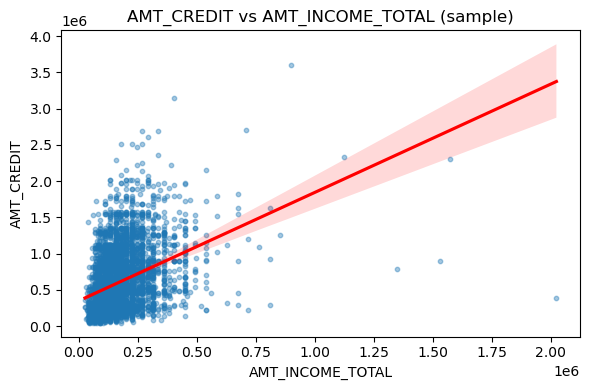

Pearson r = 0.3653, p = 1.1e-157


In [14]:

# --- Scatter plot: AMT_CREDIT vs AMT_INCOME_TOTAL (inserted inline for inspection) ---
import matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy.stats import pearsonr
df = None
if 'app_transformed' in globals():
    df = app_transformed
elif 'app_merged' in globals():
    df = app_merged
elif 'app' in globals():
    df = app
else:
    print("No application DataFrame (app/app_transformed/app_merged) found in memory. Run data-loading cells first.")

if df is not None:
    if 'AMT_CREDIT' in df.columns and 'AMT_INCOME_TOTAL' in df.columns:
        sample = df[['AMT_CREDIT','AMT_INCOME_TOTAL']].dropna().sample(n=min(5000, len(df)), random_state=42)
        plt.figure(figsize=(6,4))
        sns.regplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', data=sample, scatter_kws={'s':10,'alpha':0.4}, line_kws={'color':'red'})
        plt.title('AMT_CREDIT vs AMT_INCOME_TOTAL (sample)')
        plt.tight_layout(); plt.show()
        try:
            r,p = pearsonr(sample['AMT_INCOME_TOTAL'], sample['AMT_CREDIT'])
            print(f'Pearson r = {r:.4f}, p = {p:.3g}')
        except Exception as e:
            print('Correlation failed:', e)
    else:
        print('Required columns AMT_CREDIT and AMT_INCOME_TOTAL not present; skipping scatter.')


In [15]:

# Replace common sentinel values such as -1 with np.nan for columns where that is meaningful
def sanitize_sentinels(df):
    df = df.copy()
    # detect columns where -1 appears and where -1 is likely a sentinel (non-floating categorical/numeric)
    for col in df.columns:
        if df[col].dtype.kind in 'if' and (df[col] == -1).any():
            # if -1 is a valid value (e.g., DAYS_EMPLOYED sometimes uses 365243), don't overwrite blindly
            # we will replace -1 only when it appears but also not conflict with well-known sentinel 365243 (HomeCredit dataset)
            if (df[col] == -1).sum() > 0:
                df.loc[df[col] == -1, col] = np.nan
    # convert object columns that have low cardinality to 'category'
    for col in df.select_dtypes(include='object').columns:
        if df[col].nunique() < 200:
            df[col] = df[col].astype('category')
    return df

app = sanitize_sentinels(app)
if prev is not None:
    prev = sanitize_sentinels(prev)
print('Sanitization complete.')


Sanitization complete.


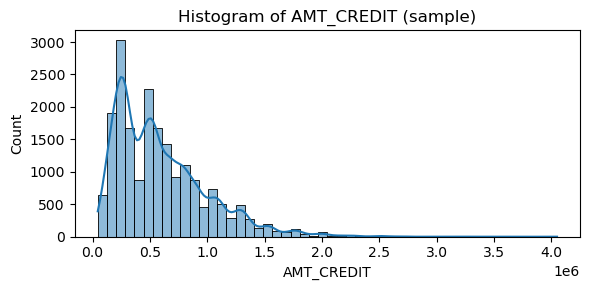

Skewness: 1.306, Kurtosis: 2.426
Highly skewed: consider log1p transform.


In [16]:

# --- Histogram + skew/kurtosis for AMT_CREDIT (inline) ---
import matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import skew, kurtosis
df = globals().get('app_transformed') or globals().get('app_merged') or globals().get('app')
if df is None:
    print('No DataFrame available for histogram.')
else:
    col = 'AMT_CREDIT' if 'AMT_CREDIT' in df.columns else None
    if col is None:
        print('AMT_CREDIT not found; skipping histogram.')
    else:
        s = df[col].dropna()
        s_sample = s.sample(n=min(20000, len(s)), random_state=42)
        plt.figure(figsize=(6,3))
        sns.histplot(s_sample, bins=50, kde=True)
        plt.title(f'Histogram of {col} (sample)')
        plt.tight_layout(); plt.show()
        print(f'Skewness: {skew(s_sample):.3f}, Kurtosis: {kurtosis(s_sample):.3f}')
        if abs(skew(s_sample))>1:
            print('Highly skewed: consider log1p transform.')


In [17]:

# Identify likely ID column (common names: SK_ID_CURR, SK_ID_PREV, ID)
def detect_id_column(df, prefer='SK_ID_CURR'):
    candidates = [c for c in df.columns if c.lower() in ('sk_id_curr','id','customer_id','sk_id')]
    if prefer in df.columns:
        return prefer
    if candidates:
        return candidates[0]
    # fallback to first column if nothing else
    return df.columns[0]

id_col = detect_id_column(app)
print('Detected application ID column:', id_col)

# For previous table, find foreign key linking to application (commonly SK_ID_CURR)
prev_fk_candidates = [c for c in (prev.columns if prev is not None else []) if c.lower() in ('sk_id_curr','id','customer_id','sk_id')]
prev_fk = prev_fk_candidates[0] if prev_fk_candidates else None
print('Detected previous_application foreign key column:', prev_fk)


Detected application ID column: SK_ID_CURR
Detected previous_application foreign key column: SK_ID_CURR


In [19]:
#------Prepare columns & lighten table----
n_rows = len(prev)
print("rows:", n_rows)

# Identify numeric and categorical columns
num_cols = prev.select_dtypes(include=['number']).columns.tolist()
cat_cols = prev.select_dtypes(include=['category','object']).columns.tolist()

# remove FK from lists if present
if prev_fk in num_cols:
    num_cols.remove(prev_fk)
if prev_fk in cat_cols:
    try:
        cat_cols.remove(prev_fk)
    except Exception:
        pass

print("Initial numeric cols:", len(num_cols))
print("Initial categorical cols:", len(cat_cols))

# Convert low-cardinality object columns to category in-place (speeds grouping)
# Heuristic: treat as category if unique/rows < 0.5 or uniques < 500
_cat_converted = []
for c in list(prev.select_dtypes(include='object').columns):
    try:
        nunique = prev[c].nunique(dropna=False)
        if (nunique / n_rows) < 0.5 or nunique < 500:
            prev[c] = prev[c].astype('category')
            _cat_converted.append(c)
    except Exception:
        pass

# Recompute cat_cols after conversion
cat_cols = prev.select_dtypes(include=['category','object']).columns.tolist()
if prev_fk in cat_cols:
    try:
        cat_cols.remove(prev_fk)
    except Exception:
        pass

print("Converted object->category for", len(_cat_converted), "columns")
print("Final numeric cols:", len(num_cols), "Final categorical cols:", len(cat_cols))

rows: 338857
Initial numeric cols: 146
Initial categorical cols: 16
Converted object->category for 0 columns
Final numeric cols: 146 Final categorical cols: 16


In [20]:
#-Numeric aggregations
import_time_msg = None

# Performance guard: limit numeric columns if too many
NUMERIC_LIMIT = None   # set to e.g. 60 to limit; keep None to aggregate all numeric cols
if NUMERIC_LIMIT is not None and len(num_cols) > NUMERIC_LIMIT:
    # choose top NUMERIC_LIMIT by non-null count (heuristic)
    nonnull_counts = prev[num_cols].notnull().sum().sort_values(ascending=False)
    selected_num_cols = nonnull_counts.index[:NUMERIC_LIMIT].tolist()
    print("Selected numeric cols (limited):", len(selected_num_cols))
else:
    selected_num_cols = num_cols
    print("Selected numeric cols (all):", len(selected_num_cols))

# Build numeric agg dict (same agg functions as original)
num_agg_funcs = ['count','nunique','mean','median','std','min','max']
agg_dict = {c: num_agg_funcs for c in selected_num_cols}

# Run grouped aggregation (this is the expensive step)
prev_num_agg = prev.groupby(prev_fk, observed=True).agg(agg_dict)

# Flatten multiindex columns to single-level names
prev_num_agg.columns = ['_'.join(map(str,col)).strip() for col in prev_num_agg.columns.values]

# Optionally persist numeric agg for Part C
# prev_num_agg.reset_index().to_parquet('prev_num_agg.parquet', index=False)

print("Numeric aggregation complete. Shape:", prev_num_agg.shape)

Selected numeric cols (all): 146
Numeric aggregation complete. Shape: (338857, 1022)


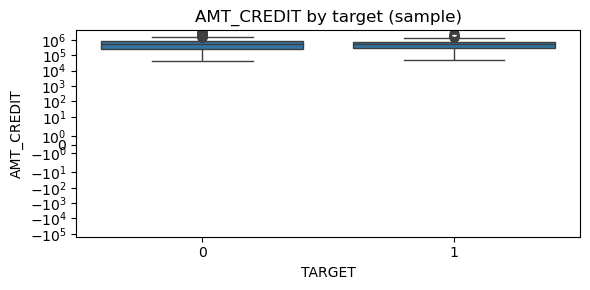

Displayed boxplot; compare medians and IQRs across target classes.


In [22]:

# --- Boxplot of AMT_CREDIT by target (if target exists) ---
import matplotlib.pyplot as plt, seaborn as sns, numpy as np
df = globals().get('app_transformed') or globals().get('app_merged') or globals().get('app')
if df is None:
    print('No DataFrame available for boxplot.')
else:
    # detect target
    target = None
    for c in df.columns:
        if c.lower() == 'target' or c.lower().startswith('is_default') or c.lower().endswith('_target'):
            target = c; break
    if target is None:
        print('No target column found; skipping boxplot by target.')
    elif 'AMT_CREDIT' not in df.columns:
        print('AMT_CREDIT not present; skipping boxplot.')
    else:
        sample = df[[target,'AMT_CREDIT']].dropna().sample(n=min(20000, len(df)), random_state=42)
        plt.figure(figsize=(6,3))
        sns.boxplot(x=target, y='AMT_CREDIT', data=sample)
        plt.yscale('symlog')
        plt.title('AMT_CREDIT by target (sample)')
        plt.tight_layout(); plt.show()
        print('Displayed boxplot; compare medians and IQRs across target classes.')


In [24]:
from functools import reduce

# Build list of available components (make a copy to avoid mutating originals)
components = []
for name in ("prev_num_agg", "cat_agg", "status_pivot"):
    if name in globals() and globals()[name] is not None:
        df = globals()[name].copy()
        # if FK present as column, set as index; otherwise assume index is FK
        try:
            if prev_fk in df.columns:
                df = df.set_index(prev_fk)
            elif df.index.name is None:
                # try set first column as index if it looks like FK
                if df.shape[1] > 0 and df.columns[0].lower() == prev_fk.lower():
                    df = df.set_index(df.columns[0])
        except Exception:
            # fallback: keep df as-is
            pass
        components.append(df)

# If nothing available, try to create minimal prev_num_agg from prev (counts)
if len(components) == 0:
    if "prev" in globals() and prev is not None:
        prev_num_agg = prev.groupby(prev_fk, observed=True).size().rename("prev_row_count").to_frame()
        prev_num_agg = prev_num_agg.copy()
        prev_num_agg.index.name = prev_fk
        components.append(prev_num_agg)
        print("Note: created minimal prev_num_agg (prev_row_count) as fallback.")
    else:
        # no data to join -> create empty DataFrame and exit gracefully
        prev_agg = pd.DataFrame()
        print("No components available for join and no `prev` DataFrame present. prev_agg is empty.")
        # continue downstream (prev_agg will be empty)
        raise RuntimeError("No joinable components found. Provide prev_num_agg, cat_agg, or status_pivot, or the prev DataFrame.")

# Perform outer join across available components
try:
    prev_agg = reduce(lambda L, R: L.join(R, how="outer"), components)
except Exception as e:
    raise RuntimeError(f"Join failed: {e}")

# Dtype-aware filling (safe)
# 1) numeric -> 0
num_cols_join = prev_agg.select_dtypes(include=["number"]).columns.tolist()
if num_cols_join:
    prev_agg[num_cols_join] = prev_agg[num_cols_join].fillna(0)

# 2) pandas categorical -> fill with mode if exists else add 'Unknown' category then fill
cat_cols_join = prev_agg.select_dtypes(include=["category"]).columns.tolist()
for c in cat_cols_join:
    if prev_agg[c].isnull().any():
        non_null = prev_agg[c].dropna()
        if len(non_null) > 0:
            try:
                mode_val = non_null.mode().iloc[0]
                if mode_val not in list(prev_agg[c].cat.categories):
                    prev_agg[c] = prev_agg[c].cat.add_categories([mode_val])
                prev_agg[c].fillna(mode_val, inplace=True)
            except Exception:
                if "Unknown" not in prev_agg[c].cat.categories:
                    prev_agg[c] = prev_agg[c].cat.add_categories(["Unknown"])
                prev_agg[c].fillna("Unknown", inplace=True)
        else:
            prev_agg[c] = prev_agg[c].cat.add_categories(["Unknown"])
            prev_agg[c].fillna("Unknown", inplace=True)

# 3) object/string -> 'Unknown'
obj_cols_join = prev_agg.select_dtypes(include=["object"]).columns.tolist()
for c in obj_cols_join:
    if prev_agg[c].isnull().any():
        prev_agg[c] = prev_agg[c].fillna("Unknown")

# 4) add prev_app_count if prev exists (safe join)
if "prev" in globals() and prev is not None:
    try:
        prev_app_count = prev.groupby(prev_fk, observed=True).size().rename("prev_app_count")
        # ensure index alignment (prev_agg index is prev_fk)
        prev_agg = prev_agg.join(prev_app_count, how="left")
        if "prev_app_count" in prev_agg.columns:
            prev_agg["prev_app_count"] = prev_agg["prev_app_count"].fillna(0).astype(int)
    except Exception as e:
        print("Warning: could not compute prev_app_count:", e)

# 5) reset index to turn FK back into column
try:
    prev_agg = prev_agg.reset_index().rename(columns={prev_agg.index.name or "index": prev_fk})
except Exception:
    prev_agg = prev_agg.reset_index()

print("prev_agg ready. shape:", getattr(prev_agg, "shape", None))



prev_agg ready. shape: (338857, 1024)


In [25]:
# ---------- minimal safe merge (drop-in replacement) ----------

if prev_agg is not None:
    # 1) ensure FK is a column (reset index if needed), same as your original
    prev_agg = prev_agg.reset_index().rename(columns={prev_agg.index.name or 'index': prev_fk})

    # 2) remove duplicate column labels (keeps first occurrence)
    if prev_agg.columns.duplicated().any():
        dups = [c for c in prev_agg.columns if list(prev_agg.columns).count(c) > 1]
        print("Removing duplicate column labels in prev_agg (examples):", list(dict.fromkeys(dups))[:5])
        prev_agg = prev_agg.loc[:, ~prev_agg.columns.duplicated()]

    # 3) try your original merging logic
    if prev_fk in app.columns:
        app_merged = app.merge(prev_agg, left_on=prev_fk, right_on=prev_fk, how='left')
    elif id_col in prev_agg.columns:
        app_merged = app.merge(prev_agg, left_on=id_col, right_on=id_col, how='left')
    else:
        app_merged = app.merge(prev_agg, left_on=id_col, right_on=prev_fk, how='left')

    # 4) avoid fillna(0) on categorical: convert categorical -> object so fillna won't raise
    cat_cols = app_merged.select_dtypes(include=['category']).columns.tolist()
    for c in cat_cols:
        app_merged[c] = app_merged[c].astype(object)

    # 5) fill numeric with 0 and non-numeric with 'Unknown'
    num_cols = app_merged.select_dtypes(include=['number']).columns.tolist()
    if num_cols:
        app_merged[num_cols] = app_merged[num_cols].fillna(0)
    # remaining columns (object / string) -> fill with 'Unknown'
    app_merged = app_merged.fillna('Unknown')

    print('Merged application shape:', app_merged.shape)
else:
    app_merged = app.copy()
    print('No merge performed; using original application table.')

Removing duplicate column labels in prev_agg (examples): ['SK_ID_CURR']
Merged application shape: (307511, 1462)


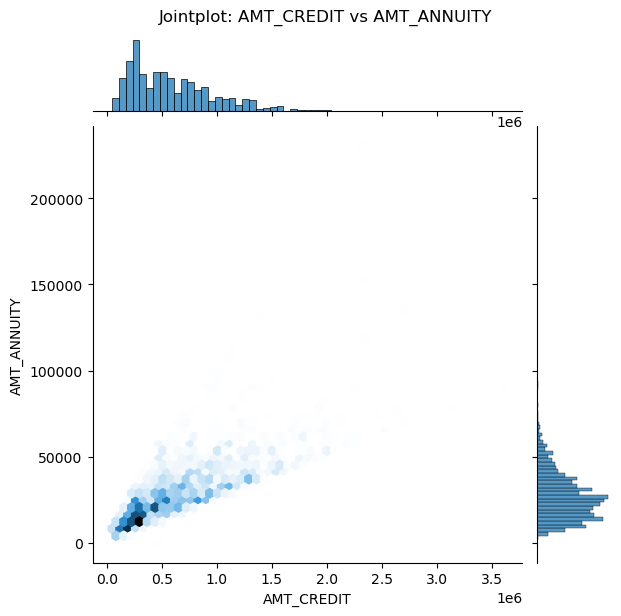

Hexbin jointplot shows density; check for proportionality or clusters.


In [27]:
import seaborn as sns, matplotlib.pyplot as plt
import pandas as pd

# Safely pick the first available DataFrame (don't use DataFrame truthiness)
df = None
for var in ('app_transformed', 'app_merged', 'app'):
    if var in globals():
        candidate = globals()[var]
        if candidate is not None and isinstance(candidate, pd.DataFrame):
            df = candidate
            break

if df is None or df.empty:
    print('No application DataFrame available or it is empty; skipping jointplot.')
else:
    if 'AMT_CREDIT' in df.columns and 'AMT_ANNUITY' in df.columns:
        # ensure we have non-null pairs before sampling
        pair_df = df[['AMT_CREDIT', 'AMT_ANNUITY']].dropna()
        sample_n = min(5000, len(pair_df))
        if sample_n == 0:
            print('No non-null AMT_CREDIT/AMT_ANNUITY pairs available; skipping jointplot.')
        else:
            sample = pair_df.sample(n=sample_n, random_state=42)
            try:
                jp = sns.jointplot(data=sample, x='AMT_CREDIT', y='AMT_ANNUITY', kind='hex', height=6)
                jp.fig.suptitle('Jointplot: AMT_CREDIT vs AMT_ANNUITY', y=1.02)
                plt.show()
                print('Hexbin jointplot shows density; check for proportionality or clusters.')
            except Exception as e:
                print('Jointplot failed:', e)
    else:
        print('Required cols AMT_CREDIT/AMT_ANNUITY not both present; skipping jointplot.')

In [29]:
# 1) Numeric columns -> fill with 0
num_cols = prev_agg.select_dtypes(include=['number']).columns.tolist()
if num_cols:
    prev_agg[num_cols] = prev_agg[num_cols].fillna(0)

# 2) Categorical columns (pd.Categorical) -> fill with mode if available, else add 'Unknown' category and fill
cat_cols = prev_agg.select_dtypes(include=['category']).columns.tolist()
for c in cat_cols:
    if prev_agg[c].isnull().any():
        non_null = prev_agg[c].dropna()
        if len(non_null) > 0:
            # use existing most-frequent value
            try:
                mode_val = non_null.mode().iloc[0]
                # ensure mode is in categories
                if mode_val not in list(prev_agg[c].cat.categories):
                    prev_agg[c] = prev_agg[c].cat.add_categories([mode_val])
                prev_agg[c].fillna(mode_val, inplace=True)
            except Exception:
                # fallback to adding 'Unknown'
                if 'Unknown' not in prev_agg[c].cat.categories:
                    prev_agg[c] = prev_agg[c].cat.add_categories(['Unknown'])
                prev_agg[c].fillna('Unknown', inplace=True)
        else:
            # all values are null — add 'Unknown' and fill
            prev_agg[c] = prev_agg[c].cat.add_categories(['Unknown'])
            prev_agg[c].fillna('Unknown', inplace=True)

# 3) Object (string) columns -> fill with 'Unknown'
obj_cols = prev_agg.select_dtypes(include=['object']).columns.tolist()
for c in obj_cols:
    if prev_agg[c].isnull().any():
        prev_agg[c] = prev_agg[c].fillna('Unknown')

# 4) If you prefer to convert categorical -> object before filling (alternative), uncomment:
# prev_agg = prev_agg.astype({c: 'object' for c in cat_cols})
# prev_agg = prev_agg.fillna(0)   # then safe because categories are no longer categorical
# quick alternative (converts categories to strings, then fill everything)
prev_agg[prev_agg.select_dtypes(include=['category']).columns] = \
    prev_agg.select_dtypes(include=['category']).astype(object)
prev_agg = prev_agg.fillna(0)

print('Previous applications aggregated into shape (after dtype-aware fill):', prev_agg.shape)

Previous applications aggregated into shape (after dtype-aware fill): (338857, 1024)


In [30]:

# Target column detection & distribution
target_candidates = [c for c in app_merged.columns if c.lower() == 'target' or c.lower().startswith('is_default') or c.lower().endswith('_target')]
target_col = target_candidates[0] if target_candidates else None
print('Detected target column:', target_col)

if target_col is not None:
    print('\nTarget distribution:')
    print(app_merged[target_col].value_counts(dropna=False))
    display(app_merged[target_col].value_counts(normalize=True))
else:
    print('No explicit target column named "TARGET" or similar found. You may have to create one (e.g., 1 for default/rejected, 0 for accepted).')


Detected target column: TARGET

Target distribution:
TARGET
0    282686
1     24825
Name: count, dtype: int64


TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

In [31]:

# Numeric summary & skew detection
num_cols = app_merged.select_dtypes(include=['number']).columns.tolist()
print('Number of numeric features:', len(num_cols))

num_summary = app_merged[num_cols].describe().T
num_summary['skew'] = app_merged[num_cols].skew().values
display(num_summary.sort_values('skew', ascending=False).head(30))

# Example transform: log1p for highly skewed positive features
skewed = num_summary[num_summary['skew'].abs() > 2].index.tolist()
print('Highly skewed numeric columns (|skew|>2):', skewed)

# Apply log1p to a copy (optional, leave original unchanged for interpretability)
app_transformed = app_merged.copy()
for c in skewed:
    if (app_transformed[c] > 0).any():
        app_transformed[c + '_log1p'] = np.log1p(app_transformed[c].clip(lower=0))


Number of numeric features: 1430


,count,mean,std,min,25%,50%,75%,max,skew
SELLERPLACE_AREA_std_max,307511.0,217.914001,3171.244772,0.0,0.0,0.0,52.792992,1.632805e+06,445.791664
SELLERPLACE_AREA_std_mean,307511.0,217.914001,3171.244772,0.0,0.0,0.0,52.792992,1.632805e+06,445.791664
SELLERPLACE_AREA_std_median,307511.0,217.914001,3171.244772,0.0,0.0,0.0,52.792992,1.632805e+06,445.791664
SELLERPLACE_AREA_std,307511.0,217.914001,3171.244772,0.0,0.0,0.0,52.792992,1.632805e+06,445.791664
SELLERPLACE_AREA_std_min,307511.0,217.914001,3171.244772,0.0,0.0,0.0,52.792992,1.632805e+06,445.791664
FLAG_DOCUMENT_12_log1p,307511.0,0.000005,0.001768,0.0,0.0,0.0,0.000000,6.931472e-01,392.114779
FLAG_DOCUMENT_12,307511.0,0.000007,0.002550,0.0,0.0,0.0,0.000000,1.000000e+00,392.114779
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.000000,1.170000e+08,391.559654
SELLERPLACE_AREA_min_mean,307511.0,259.582942,12589.993046,0.0,0.0,15.0,51.000000,4.000000e+06,312.914350
SELLERPLACE_AREA_min_median,307511.0,259.582942,12589.993046,0.0,0.0,15.0,51.000000,4.000000e+06,312.914350


Highly skewed numeric columns (|skew|>2): ['TARGET', 'AMT_INCOME_TOTAL', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_

In [32]:

# Outlier capping using IQR (example function)
def cap_outliers_iqr(series, lower_q=0.01, upper_q=0.99):
    ql = series.quantile(lower_q)
    qu = series.quantile(upper_q)
    iqr = qu - ql
    lower_bound = ql - 1.5 * iqr
    upper_bound = qu + 1.5 * iqr
    return series.clip(lower=lower_bound, upper=upper_bound)

# Demonstration on a numeric column
demo_col = num_cols[0] if num_cols else None
if demo_col:
    app_transformed[demo_col + '_capped'] = cap_outliers_iqr(app_transformed[demo_col])
    print('Outlier capping applied to', demo_col)


Outlier capping applied to SK_ID_CURR


Top correlated pairs (abs corr):


FLAG_DOCUMENT_17                        FLAG_DOCUMENT_17_log1p                  1.000000
FLAG_DOCUMENT_8_log1p                   FLAG_DOCUMENT_8                         1.000000
REG_REGION_NOT_WORK_REGION              REG_REGION_NOT_WORK_REGION_log1p        1.000000
FLAG_DOCUMENT_19                        FLAG_DOCUMENT_19_log1p                  1.000000
FLAG_DOCUMENT_7_log1p                   FLAG_DOCUMENT_7                         1.000000
TARGET_log1p                            TARGET                                  1.000000
FLAG_DOCUMENT_18                        FLAG_DOCUMENT_18_log1p                  1.000000
FLAG_DOCUMENT_15_log1p                  FLAG_DOCUMENT_15                        1.000000
LIVE_REGION_NOT_WORK_REGION_log1p       LIVE_REGION_NOT_WORK_REGION             1.000000
FLAG_DOCUMENT_6                         FLAG_DOCUMENT_6_log1p                   1.000000
prev_app_count_log1p                    AMT_CREDIT_count_log1p                  1.000000
NFLAG_LAST_APPL_IN_DA

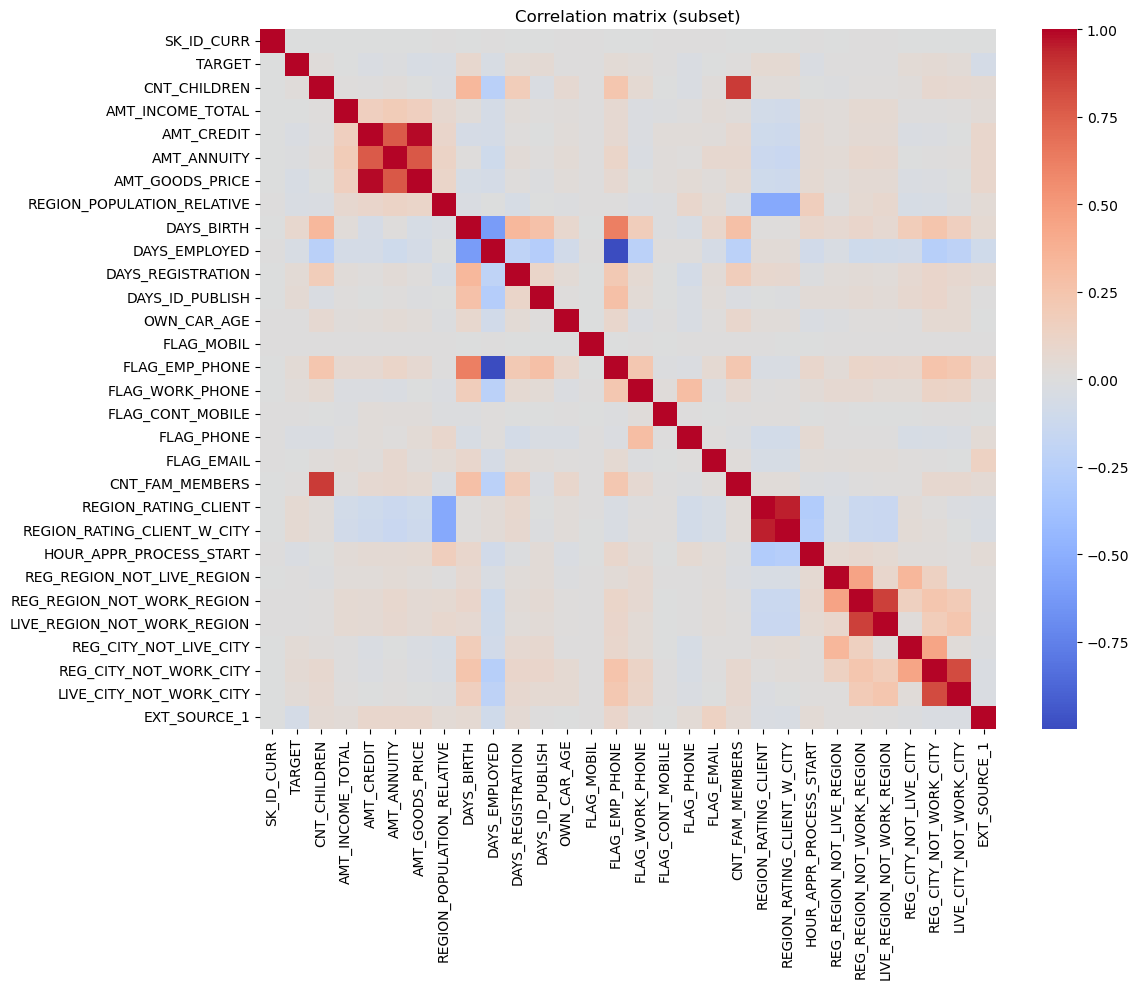

In [33]:

# Correlation heatmap (top correlated features)
import matplotlib.pyplot as plt
import seaborn as sns

corr = app_transformed[num_cols].corr()
# Show top correlations by absolute value
corr_abs = corr.abs().unstack().sort_values(kind='quicksort', ascending=False).drop_duplicates()
top_pairs = corr_abs[corr_abs < 1].dropna().head(30)
print('Top correlated pairs (abs corr):')
display(top_pairs)

# Plot heatmap for a subset (this can be heavy for many columns)
subset = num_cols[:30]  # change as needed
plt.figure(figsize=(12,10))
sns.heatmap(app_transformed[subset].corr(), annot=False, fmt='.2f', cmap='coolwarm')
plt.title('Correlation matrix (subset)')
plt.tight_layout()
plt.show()


In [34]:

# VIF computation sample (requires statsmodels)
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
X = app_transformed[num_cols].fillna(0).select_dtypes(include=['number']).iloc[:, :20]  # limit to first 20 numeric for speed
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [vif(X.values, i) for i in range(X.shape[1])]
display(vif_data.sort_values('VIF', ascending=False).head(20))


,feature,VIF
13,FLAG_MOBIL,14693.012767
14,FLAG_EMP_PHONE,11539.325895
9,DAYS_EMPLOYED,2482.992310
16,FLAG_CONT_MOBILE,536.164555
4,AMT_CREDIT,125.129951
6,AMT_GOODS_PRICE,124.077459
19,CNT_FAM_MEMBERS,29.863100
8,DAYS_BIRTH,28.921461
5,AMT_ANNUITY,11.697611
0,SK_ID_CURR,8.324513


In [35]:

# Baseline model (if target exists)
if target_col is not None:
    from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

    # simple feature set: numeric columns only (drop the target)
    feats = [c for c in num_cols if c != target_col]
    X = app_transformed[feats].fillna(0)
    y = app_transformed[target_col].fillna(0).astype(int)

    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    preds = model.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y_test, preds)
    print('Baseline Logistic Regression AUC:', round(auc,4))

    # feature importance (coefficients)
    coeffs = pd.Series(model.coef_[0], index=X.columns).sort_values(key=lambda x: x.abs(), ascending=False).head(30)
    display(coeffs)
else:
    print('No target column; skipping baseline model cell.')


Baseline Logistic Regression AUC: 0.6134


DAYS_BIRTH                             6.634129e-05
DAYS_REGISTRATION                      3.086832e-05
DAYS_ID_PUBLISH                        2.056831e-05
DAYS_LAST_PHONE_CHANGE                 1.596200e-05
AMT_ANNUITY                            8.848344e-06
AMT_GOODS_PRICE                       -4.026894e-06
AMT_CREDIT                             3.084313e-06
SK_ID_CURR                            -1.413091e-06
SK_ID_CURR_capped                     -1.413091e-06
AMT_DOWN_PAYMENT_std_median           -1.259099e-06
AMT_DOWN_PAYMENT_std                  -1.259099e-06
AMT_DOWN_PAYMENT_std_mean             -1.259099e-06
AMT_DOWN_PAYMENT_std_max              -1.259099e-06
AMT_DOWN_PAYMENT_std_min              -1.259099e-06
AMT_ANNUITY_min_max                    1.219220e-06
AMT_ANNUITY_min_min                    1.219220e-06
AMT_ANNUITY_min_median                 1.219220e-06
AMT_ANNUITY_min_mean                   1.219220e-06
AMT_ANNUITY_min                        1.219220e-06
AMT_DOWN_PAY

In [36]:

# Tree-based feature importances (example)
if target_col is not None:
    try:
        from xgboost import XGBClassifier
        model_xgb = XGBClassifier(n_estimators=200, max_depth=6, random_state=42, use_label_encoder=False, eval_metric='logloss')
        model_xgb.fit(X.fillna(0), y)
        fi = pd.Series(model_xgb.feature_importances_, index=X.columns).sort_values(ascending=False).head(40)
        display(fi)
    except Exception as e:
        print('XGBoost not available or failed to run:', e)


TARGET_log1p                            0.999996
EXT_SOURCE_2                            0.000002
EXT_SOURCE_3                            0.000002
SK_ID_CURR                              0.000000
DAYS_DECISION_count_count               0.000000
DAYS_DECISION_count_max                 0.000000
DAYS_DECISION_count_min                 0.000000
DAYS_DECISION_count_std                 0.000000
DAYS_DECISION_count_median              0.000000
DAYS_DECISION_count_mean                0.000000
DAYS_DECISION_count_nunique             0.000000
RATE_INTEREST_PRIVILEGED_max_max        0.000000
DAYS_DECISION_nunique_nunique           0.000000
RATE_INTEREST_PRIVILEGED_max_min        0.000000
RATE_INTEREST_PRIVILEGED_max_std        0.000000
RATE_INTEREST_PRIVILEGED_max_median     0.000000
RATE_INTEREST_PRIVILEGED_max_mean       0.000000
RATE_INTEREST_PRIVILEGED_max_nunique    0.000000
RATE_INTEREST_PRIVILEGED_max_count      0.000000
RATE_INTEREST_PRIVILEGED_min_max        0.000000
RATE_INTEREST_PRIVIL

Displaying SHAP summary plot (inline).


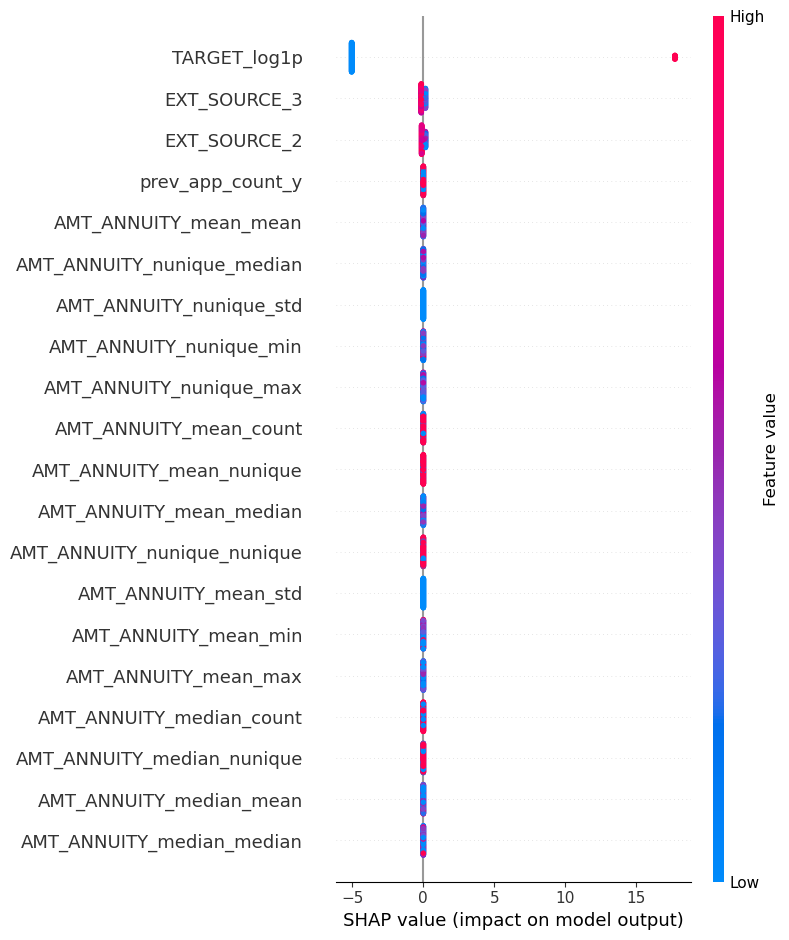

In [37]:

# SHAP explanation (sample)
if target_col is not None:
    try:
        import shap
        explainer = shap.Explainer(model_xgb) if 'model_xgb' in globals() else None
        if explainer is not None:
            # compute shap values on a sample
            X_sample = X.sample(min(200, len(X)), random_state=42).fillna(0)
            shap_values = explainer(X_sample)
            print('Displaying SHAP summary plot (inline).')
            shap.summary_plot(shap_values, X_sample, show=True)
        else:
            print('No tree model available for SHAP demonstration.')
    except Exception as e:
        print('SHAP unavailable or failed:', e)



## Actionable analysis: what drives *rejections* (or application failures)

Below are general actionable checks and steps. Use the cells after this markdown to compute the concrete metrics for your dataset.

**Common signals associated with rejection / default risk:**

- High loan amount relative to income (AMT_CREDIT / AMT_INCOME_TOTAL).
- Unstable employment (short employment length / many job changes).
- Very young or very old applicants (age extremes).
- Many previously refused applications (`prev_status_Refused` or similar).
- High number of annuities or existing loans (CNT_PAYMENT, CNT_CREDIT_PROLONGED-like features).
- Missing or suspicious identity information (e.g., many missing contact fields).

**Business actions you can take:**
- Define hard rejection rules for extreme ratios (e.g., credit_to_income > threshold).
- Create soft decline with manual review for borderline cases flagged by model.
- Offer smaller credit limits rather than outright rejection for moderate-risk applicants.
- Flag applicants with multiple recent refusals for manual verification of identity/data accuracy.
- Track and monitor feature drift on deployed scoring model.

Next cell computes practical metrics from your dataset to identify top rejection drivers.


In [38]:

# Compute difference of means for numeric features between rejected vs accepted (if target exists)
if target_col is not None:
    accepted = app_transformed[app_transformed[target_col] == 0]
    rejected = app_transformed[app_transformed[target_col] == 1]
    diff = []
    for c in num_cols:
        if c not in (target_col,):
            mean_acc = accepted[c].mean() if len(accepted)>0 else np.nan
            mean_rej = rejected[c].mean() if len(rejected)>0 else np.nan
            diff.append((c, mean_acc, mean_rej, mean_rej - mean_acc))
    diff_df = pd.DataFrame(diff, columns=['feature','mean_accepted','mean_rejected','delta']).sort_values('delta', key=lambda x: x.abs(), ascending=False)
    display(diff_df.head(40))
else:
    print('No target available; cannot compute rejection-driven differences.')


,feature,mean_accepted,mean_rejected,delta
5,AMT_GOODS_PRICE,5.422434e+05,4.885588e+05,-53684.593179
3,AMT_CREDIT,6.026483e+05,5.577785e+05,-44869.754328
8,DAYS_EMPLOYED,6.569615e+04,4.239468e+04,-23301.470679
454,SK_ID_PREV_min_max,9.703784e+05,9.808038e+05,10425.374901
450,SK_ID_PREV_min_mean,9.703784e+05,9.808038e+05,10425.374901
451,SK_ID_PREV_min_median,9.703784e+05,9.808038e+05,10425.374901
110,SK_ID_PREV_min,9.703784e+05,9.808038e+05,10425.374901
453,SK_ID_PREV_min_min,9.703784e+05,9.808038e+05,10425.374901
429,SK_ID_PREV_mean_mean,1.283401e+06,1.292991e+06,9590.178583
107,SK_ID_PREV_mean,1.283401e+06,1.292991e+06,9590.178583


In [39]:

# Save cleaned/merged datasets for modeling and downstream use
clean_app_path = os.path.join(cwd, 'application_cleaned.csv')
app_transformed.to_csv(clean_app_path, index=False)
print('Saved cleaned application to', clean_app_path)

if prev_agg is not None:
    prev_agg_path = os.path.join(cwd, 'previous_aggregated.csv')
    prev_agg.reset_index().to_csv(prev_agg_path, index=False)
    print('Saved aggregated previous applications to', prev_agg_path)


Saved cleaned application to c:\Users\mruna\Downloads\application_cleaned.csv
Saved aggregated previous applications to c:\Users\mruna\Downloads\previous_aggregated.csv


In [40]:

# Helpful utility functions (reusable)
import numpy as np
def show_top_missing(df, n=20):
    m = df.isnull().sum().sort_values(ascending=False).head(n)
    return pd.DataFrame({'n_missing': m, 'pct_missing': (m/len(df))*100})

def compute_credit_to_income(df, credit_col='AMT_CREDIT', income_col='AMT_INCOME_TOTAL'):
    if credit_col in df.columns and income_col in df.columns:
        return df[credit_col] / (df[income_col].replace(0, np.nan))
    else:
        return None
